In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

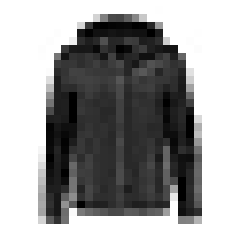

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

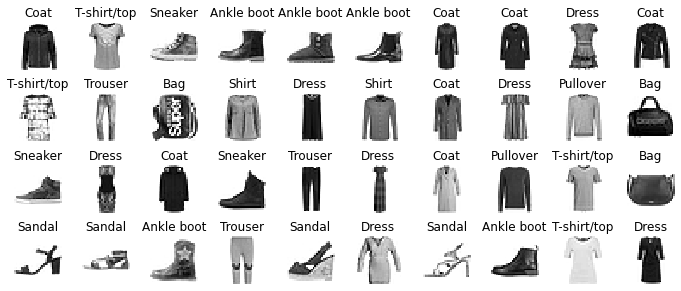

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [13]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [14]:
print(weights.shape)

(784, 300)


In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

In [18]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [19]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

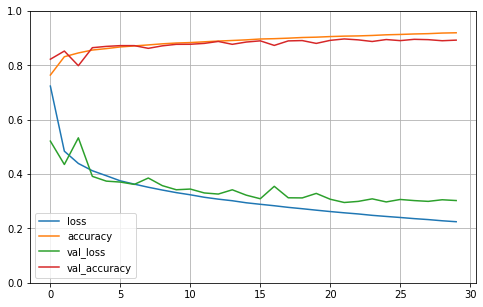

In [29]:
import pandas as pd
df_relu = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

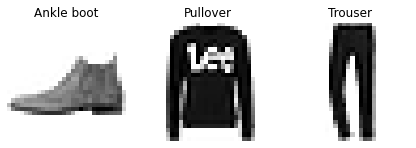

In [27]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

In [30]:
results = [df_relu]
names = ['relu','elu','LeakyRELU']

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6444 - accuracy: 0.7808 - val_loss: 0.4994 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4766 - accuracy: 0.8309 - val_loss: 0.4355 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4415 - accuracy: 0.8427 - val_loss: 0.4940 - val_accuracy: 0.8126
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4200 - accuracy: 0.8519 - val_loss: 0.4061 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4055 - accuracy: 0.8577 - val_loss: 0.3958 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3907 - accuracy: 0.8625 - val_loss: 0.3855 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3812 - accuracy: 0.8649 - val_loss: 0.3793 - val_accuracy:

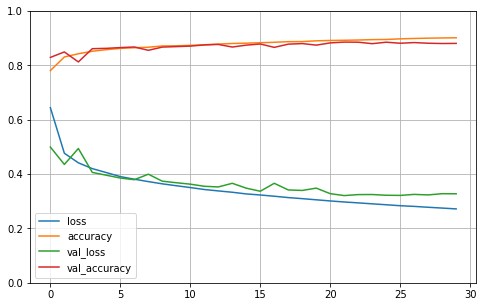

In [31]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu"),
    keras.layers.Dense(100, activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
results.append(pd.DataFrame(history2.history))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8691


[0.36071473360061646, 0.8690999746322632]

In [33]:
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.93],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = np.argmax(model2.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7060 - accuracy: 0.7630 - val_loss: 0.5204 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4886 - accuracy: 0.8275 - val_loss: 0.4419 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4472 - accuracy: 0.8414 - val_loss: 0.5218 - val_accuracy: 0.8012
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4239 - accuracy: 0.8508 - val_loss: 0.4071 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4078 - accuracy: 0.8569 - val_loss: 0.3906 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3917 - accuracy: 0.8624 - val_loss: 0.3901 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8649 - val_loss: 0.3771 - val_accuracy:

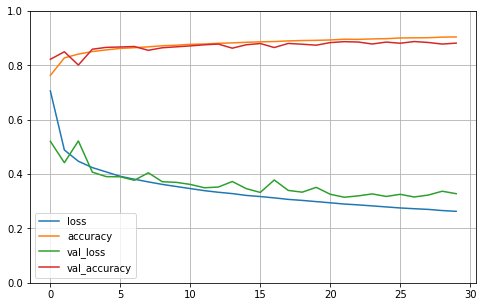

In [35]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='LeakyReLU'),
    keras.layers.Dense(100, activation='LeakyReLU'),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history3 = model3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
results.append(pd.DataFrame(history3.history))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8731


[0.3595198094844818, 0.8730999827384949]

In [37]:
y_proba = model3.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.94],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = np.argmax(model3.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

# Zad. 
Stwórz wykres porównujący metody. 

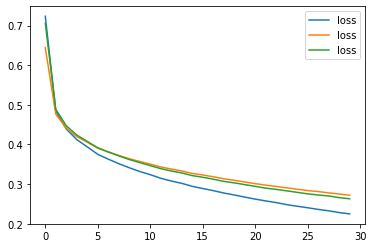

In [39]:
fig, ax = plt.subplots(1,1)
activation_fun = ['relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[0]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[0]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[0]]].plot(label=activation_fun[2],ax=ax)
plt.show()

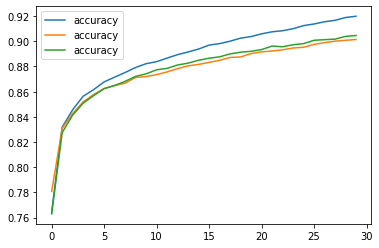

In [40]:
fig, ax = plt.subplots(1,1)
activation_fun = ['relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[1]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[1]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[1]]].plot(label=activation_fun[2],ax=ax)
plt.show()

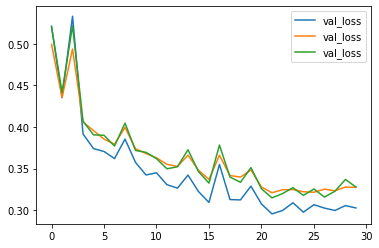

In [41]:
fig, ax = plt.subplots(1,1)
activation_fun = ['relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[2]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[2]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[2]]].plot(label=activation_fun[2],ax=ax)
plt.show()

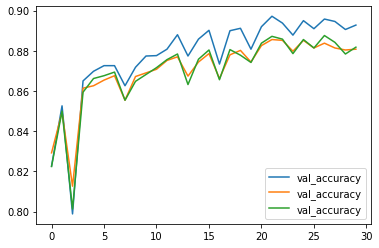

In [42]:
fig, ax = plt.subplots(1,1)
activation_fun = ['relu','elu','LeakyReLU']
keys=['loss','accuracy','val_loss','val_accuracy']
results[0].loc[:,[keys[3]]].plot(label=activation_fun[0],ax=ax)
results[1].loc[:,[keys[3]]].plot(label=activation_fun[1],ax=ax)
results[2].loc[:,[keys[3]]].plot(label=activation_fun[2],ax=ax)
plt.show()